<a href="https://colab.research.google.com/github/HaddoucheSara/ML_Mini_projet/blob/Fati/Mini_projet_D%E2%80%99application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prétraitement des données** 🗒

---



## **Importation des bibliothèques :**



In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer



## ***Chargement du dataset :***



***`Téléversez votre fichier de clé API Kaggle (kaggle.json) sur Colab`***

In [37]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))


Saving study_performance.csv to study_performance (1).csv
User uploaded file "study_performance (1).csv" with length 72036 bytes


In [38]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [39]:
!chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


**`Téléchargez l'ensemble de données depuis Kaggle :`**

In [40]:
!kaggle datasets download -d bhavikjikadara/student-study-performance

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


***`Dézippez l'ensemble de données`***

In [41]:
!unzip student-study-performance.zip

unzip:  cannot find or open student-study-performance.zip, student-study-performance.zip.zip or student-study-performance.zip.ZIP.


## ***Exploration des données :***

***`Charger l'ensemble de données dans un DataFrame Pandas et afficher les premières lignes du jeu de données`***

In [42]:
data = pd.read_csv('study_performance.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


***`Vérifier les types de données de chaque colonne`***

In [43]:
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

***`Vérifier les valeurs manquantes`***

In [44]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

## ***Prétraitement des données***

***`Gérer les valeurs manquantes`***

In [45]:
imputer = SimpleImputer(strategy="mean")
data[["math_score", "reading_score", "writing_score"]] = imputer.fit_transform(data[["math_score", "reading_score", "writing_score"]])

***`Encodage des variables catégorielles`***

In [46]:
encoder = OneHotEncoder(drop="first")
transformer = ColumnTransformer(transformers=[("onehot", encoder, ["gender", "race_ethnicity", "parental_level_of_education", "lunch", "test_preparation_course"])], remainder="passthrough")
data_encoded = transformer.fit_transform(data)


***`Normalisation des données numériques`***

In [47]:
scaler = StandardScaler()
data_encoded[:, -3:] = scaler.fit_transform(data_encoded[:, -3:])

In [48]:
encoded_columns = transformer.get_feature_names_out()

***`Création d'un nouveau dataframe avec les données prétraitées`***

In [49]:
data_preprocessed = pd.DataFrame(data_encoded, columns=encoded_columns)

***`Afficher les premières lignes du dataframe prétraité`***

In [50]:
data_preprocessed.head()

,onehot__gender_male,onehot__race_ethnicity_group B,onehot__race_ethnicity_group C,onehot__race_ethnicity_group D,onehot__race_ethnicity_group E,onehot__parental_level_of_education_bachelor's degree,onehot__parental_level_of_education_high school,onehot__parental_level_of_education_master's degree,onehot__parental_level_of_education_some college,onehot__parental_level_of_education_some high school,onehot__lunch_standard,onehot__test_preparation_course_none,remainder__math_score,remainder__reading_score,remainder__writing_score
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.390024,0.193999,0.391492
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.192076,1.427476,1.313269
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.577711,1.770109,1.642475
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.259543,-0.833899,-1.583744
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.653954,0.605158,0.457333


# **Mise en œuvre des algorithmes d’apprentissage** 🗒

---



### ***Modèle 1 : Régression Ridge***

#### ***Séparation du dataset en caractéristiques (features) et variable cible(target)***

In [51]:
# Séparation des caractéristiques (features) et de la variable cible
X = data_preprocessed.drop(['remainder__math_score', 'remainder__reading_score', 'remainder__writing_score'], axis=1)
Y = data_preprocessed['remainder__math_score']

# Affichage des caractéristiques (features) du jeu de données
print("Caractéristiques de notre ensemble de données :")
print(X.head())

# Affichage de la variable cible
print("\nNotre variable cible :")
print(Y.head())

Caractéristiques de notre ensemble de données :
   onehot__gender_male  onehot__race_ethnicity_group B  \
0                  0.0                             1.0   
1                  0.0                             0.0   
2                  0.0                             1.0   
3                  1.0                             0.0   
4                  1.0                             0.0   

   onehot__race_ethnicity_group C  onehot__race_ethnicity_group D  \
0                             0.0                             0.0   
1                             1.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             1.0                             0.0   

   onehot__race_ethnicity_group E  \
0                             0.0   
1                             0.0   
2                             0.0   
3                             0.0   
4  

#### ***Division du dataset en ensembles d'entraînement et de test***


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### ***Création , entraînement et évaluation du modèle***

In [53]:
from sklearn.linear_model import Ridge
# Créer une instance du modèle de régression Ridge
modele1 = Ridge(alpha=1.0)

# Entraîner le modèle sur l'ensemble d'entraînement
modele1.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions = modele1.predict(X_test)

#### ***Mesure de la précision du modèle de régression ridge***

In [54]:
from sklearn.metrics import mean_squared_error
# Calculer l'erreur quadratique moyenne (RMSE) pour évaluer les performances du modèle
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)


coefficients = modele1.coef_
intercept = modele1.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)

RMSE: 0.9347438002665852
Coefficients: [ 2.96104576e-01 -4.52747503e-04  2.75218945e-02  2.24973534e-01
  5.82263950e-01  2.04151988e-01 -2.67829322e-01  7.04155561e-02
 -8.81512718e-03 -1.90039256e-01  7.56494822e-01 -3.85639986e-01]
Intercept: -0.44776508161343276


### ***Modèle 2 : Arbres de décision***

#### ***Création , entraînement et évaluation du modèle***

In [55]:
from sklearn.tree import DecisionTreeRegressor

# Créer une instance du modèle de régression par arbres de décision
modele2 = DecisionTreeRegressor(random_state=42)

# Entraîner le modèle sur l'ensemble d'entraînement
modele2.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions_arbre = modele2.predict(X_test)

# Calculer l'erreur quadratique moyenne (RMSE) pour évaluer les performances du modèle
rmse_arbre = np.sqrt(mean_squared_error(y_test, predictions_arbre))
print("RMSE (Arbre de décision):", rmse_arbre)

RMSE (Arbre de décision): 1.0621972757549993


#### ***Visualisation de l'arbre***

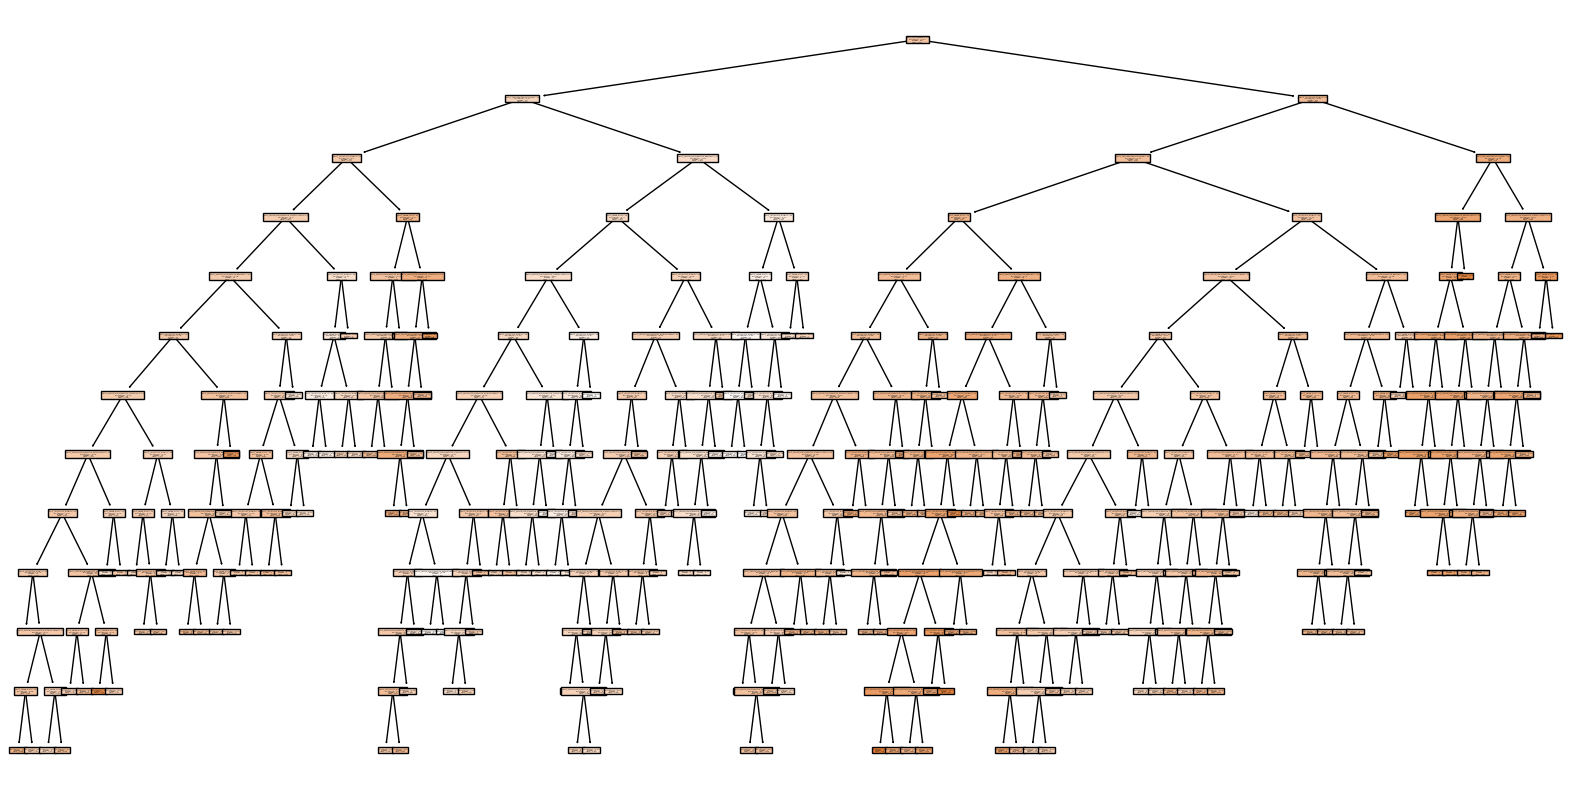

In [56]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt


# Visualiser l'arbre de décision avec une figure plus grande
plt.figure(figsize=(20, 10))
plot_tree(modele2, filled=True, feature_names=X.columns)
plt.show()


### ***Modèle 3 : Régression linéaire***